<a href="https://colab.research.google.com/github/Toadoum/Machine-Learning-from-scratch/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src='https://aims-senegal.org/wp-content/uploads/sites/2/2020/10/aims_senegal.jpg' /></a>

This tutorial is inspired by [Assignment 1](https://web.eecs.umich.edu/~justincj/teaching/eecs498/FA2020/assignment1.html) from the "Deep Learning for Computer Vision EECS 498-007 / 598-005" Course (University of Michigan).



# KNN:

**K** **N**earest **N**eighbors algorithm is a non-parametric supervised learning method that is used to solve classification and regression tasks.

---

The KNN algorithm output is calculated based on the k closest training examples.

---

In classification: the output is a class membership. An object is classified by a majority vote of its neighbors, with the object being assigned to the class most common among its K nearest neighbors (K is a positive integer, typically small). If K = 1, then the object is simply assigned to the class of that single nearest neighbor.

---

In regression: the output is a continous value for the object. This value is the average of the values of k nearest neighbors.

---


# KNN Classifier:

<img src='https://miro.medium.com/max/1400/0*34SajbTO2C5Lvigs.png' />

In KNN a commonly used distance function for continuous variables is **Euclidean distance**. For discrete variables, such as for text classification, another metric can be used, such as the **Hamming distance**.



---



#KNN and decsion boundaries

<img src='https://i.stack.imgur.com/jz0hd.jpg' />

**In this tutorial we will build a KNN based Classfier for the images of CIFAR-10**

[CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html) is a widely used dataset in ML practice. It consists of 50000 train images and 10000 test images spanning 10 classes.

The classes are: 'plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'

We will be using pytorch in this tutorial to load the dataset (don't worry about this for now).

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np


# Download CIFAR10 dataset:

In [ ]:

transform = transforms.Compose([transforms.ToTensor()])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                        download=True, transform=transform)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [ ]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=50000,
                                          shuffle=True, num_workers=2)
x_train, y_train = next(iter(trainloader))

testloader = torch.utils.data.DataLoader(testset, batch_size=10000,
                                          shuffle=True, num_workers=2)
x_test, y_test = next(iter(testloader))

**In this tutorial we will only use 1000 train samples and 100 test samples**

In [ ]:
x_train = x_train[:1000]
y_train = y_train[:1000]

x_test = x_test[:100]
y_test = y_test[:100]

In [ ]:
x_train.shape, y_train.shape

(torch.Size([1000, 3, 32, 32]), torch.Size([1000]))

In [ ]:
x_test.shape, y_test.shape

(torch.Size([100, 3, 32, 32]), torch.Size([100]))

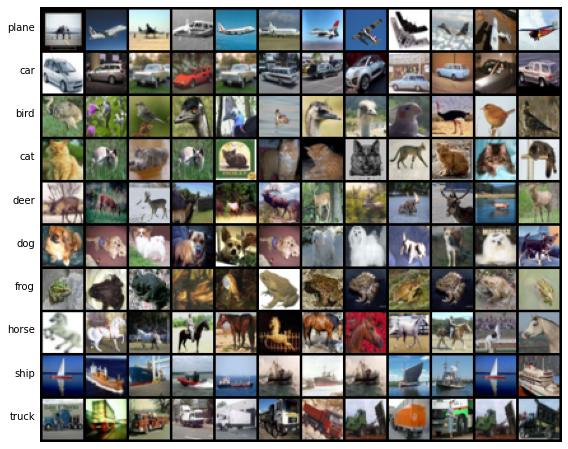

In [ ]:
import random
from torchvision.utils import make_grid
fig = plt.gcf()
fig.set_size_inches(15, 8)
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
samples_per_class = 12
samples = []
for y, cls in enumerate(classes):
  plt.text(-4, 34 * y + 18, cls, ha='right')
  idxs = (y_train == y).nonzero().view(-1)
  for i in range(samples_per_class):
    idx = idxs[random.randrange(idxs.shape[0])].item()
    samples.append(x_train[idx])
img = torchvision.utils.make_grid(samples, nrow=samples_per_class)
plt.imshow(transforms.ToPILImage()(img))
plt.axis('off')
plt.show()

In [ ]:
# Flatten the data

x_train = x_train.reshape(x_train.shape[0], -1).numpy()
y_train = y_train.numpy()

In [ ]:
x_train.shape, y_train.shape

((1000, 3072), (1000,))

In [ ]:
x_test = x_test.reshape(x_test.shape[0], -1).numpy()
y_test = y_test.numpy()
x_test.shape,y_test.shape

((100, 3072), (100,))

# Two Loops KNN Implementaion

In [ ]:
def KNN_two_loops(x_train, x_test):
  
  num_train = x_train.shape[0]
  num_test = x_test.shape[0]
  dist = np.zeros((num_train, num_test))
  
  
    #####################################################################
    # TODO:                                                             #
    # Compute the l2 distance between the ith test point and the jth    #
    # training point, and store the result in dists[i, j]. You should   #
    # not use a loop over dimension.                                    #
    #####################################################################
    #dists[i, j] = np.sqrt(np.sum((X[i, :] - self.X_train[j, :]) ** 2))
  
  for i in range(num_test):
    for j in range(num_train):
      #dist[j,i] = np.sqrt(np.sum((x_test[i]-x_train[j])**2))
      dist[j,i]= np.linalg.norm(x_test[i]-x_train[j])


  
  ##############################################################################
  #                             END OF YOUR CODE                               #
  ##############################################################################
  return dist

In [ ]:
dist2loops = KNN_two_loops(x_train, x_test)
dist2loops

array([[23.27902222, 20.15662766, 19.41179657, ..., 14.65559673,
        15.97331429, 19.43609047],
       [27.41018677, 22.2047596 , 16.77554703, ..., 17.53961563,
        14.25646496, 19.21478081],
       [22.765028  , 18.67351151, 19.69312859, ..., 17.82361412,
        14.47616005, 20.88526535],
       ...,
       [17.3908577 , 17.90643692, 16.57505608, ..., 20.8068428 ,
        13.20798111, 15.82537556],
       [19.82724571, 16.04821777, 18.829813  , ..., 16.24042511,
        15.2360878 , 18.58565712],
       [22.80060196, 20.99165726, 16.229105  , ..., 16.99461174,
        11.5239315 , 18.33984184]])

#KNN Vectorized Implementation(No Loop)

In [ ]:

def KNN(X_train, X_test):
    '''
    X_train: (n_tr_samples, n_features)
    X_test: (n_ts_samples, n_features)

    '''
    num_train = X_train.shape[0]
    num_test = X_test.shape[0]
    dist = np.zeros((num_train, num_test))

  ##############################################################################
  # TODO: Implement this function without loop. #HINT: Try to formulate 
   
  # the Euclidean distance using two broadcast sums and a matrix multiply.
  ##############################################################################
    a = np.sum(X_train**2, axis=1)
    b = np.sum(X_test**2, axis=1)
    dist=np.sqrt(-2 * X_train@X_test.T + a.reshape(-1,1) + b.T.reshape(1,-1))
  ##############################################################################
  #                             END OF YOUR CODE                               #
  ##############################################################################
    return dist

    

In [ ]:
dist = KNN(x_train, x_test)
dist

array([[23.279026, 20.15663 , 19.411797, ..., 14.655592, 15.973308,
        19.436089],
       [27.410187, 22.20476 , 16.775549, ..., 17.539614, 14.256459,
        19.21478 ],
       [22.76503 , 18.673508, 19.693127, ..., 17.82361 , 14.476162,
        20.885267],
       ...,
       [17.390871, 17.906454, 16.575058, ..., 20.806843, 13.207978,
        15.825383],
       [19.827251, 16.048223, 18.829807, ..., 16.240423, 15.236084,
        18.585655],
       [22.800611, 20.991657, 16.229109, ..., 16.994614, 11.523917,
        18.33984 ]], dtype=float32)

##Test the difference in values

In [ ]:
torch.manual_seed(0)
x_train_rand = np.random.randn(100, 3*32*32)
x_test_rand = np.random.randn(100, 3*32*32)

dists_two = KNN_two_loops(x_train_rand, x_test_rand, )
print(dists_two.shape)
dists_none = KNN(x_train_rand, x_test_rand,)
print(dists_none.shape)
difference = np.sqrt(np.sum(np.power((dists_two - dists_none), 2)))
print('Difference: ', difference)
if difference < 1e-4:
  print('Good! The distance matrices match')
else:
  print('Uh-oh! The distance matrices are different')

(100, 100)
(100, 100)
Difference:  7.143693623877883e-13
Good! The distance matrices match


##Bonus:1-Loop Implementation

In [ ]:
##YOUR CODE HERE 
def KNN_one_loops(x_train, x_test):

    num_test = x_test.shape[0]
    num_train = x_train.shape[0]
    dists = np.zeros((num_test, num_train))
    for i in range(num_test):
      dist[i,:] = np.sqrt(((x_train[i,:] - x_test)**2).sum(axis=1))

    return dist

In [ ]:
dist1loops = KNN_one_loops(x_train, x_test)
dist1loops

array([[23.279022, 20.156628, 19.411797, ..., 14.655599, 15.973314,
        19.43609 ],
       [27.410187, 22.20476 , 16.775547, ..., 17.539616, 14.256466,
        19.214783],
       [22.765028, 18.673512, 19.693129, ..., 17.823616, 14.476161,
        20.885267],
       ...,
       [17.390871, 17.906454, 16.575058, ..., 20.806843, 13.207978,
        15.825383],
       [19.827251, 16.048223, 18.829807, ..., 16.240423, 15.236084,
        18.585655],
       [22.800611, 20.991657, 16.229109, ..., 16.994614, 11.523917,
        18.33984 ]], dtype=float32)

# Loops vs Vectorization: Speed Test

In [ ]:
%timeit  KNN(x_train, x_test)


10 loops, best of 5: 22.2 ms per loop


In [ ]:
%timeit  KNN_two_loops(x_train, x_test,)

1 loop, best of 5: 868 ms per loop


In [ ]:
print(f'The Vectorized Inplementaion is {(1.39*1000)/28.2:.2f} times faster than using loops')

The Vectorized Inplementaion is 49.29 times faster than using loops


#Predict Labels

In [ ]:
def predict_labels(dists, y_train, k=1):
  """
  Given distances between all pairs of training and test samples, predict a
  label for each test sample by taking a **majority vote** among its k nearest
  neighbors in the training set.


  Inputs:
  - dists: array of shape (num_train, num_test) where dists[i, j] is the
    squared Euclidean distance between the ith training point and the jth test
    point.
  - y_train: array shape (num_train,) giving labels for all training
    samples. Each label is an integer in the range [0, num_classes - 1]
  - k: The number of nearest neighbors to use for classification.

  Returns:
  - y_pred: array of shape (num_test,) giving predicted labels
    for the test data, where y_pred[j] is the predicted label for the jth test
    example. Each label should be an integer in the range [0, num_classes - 1].
  """
  num_train, num_test = dists.shape
  y_pred = np.zeros(num_test)
  for i in range(num_test):
 
  ##############################################################################
  # TODO: Implement this function. You may use an explicit loop over the test  #
  # HINT: look for Counters in python 
  ##############################################################################
  
    neighbors = []
    indexes = np.argsort(dists[:,i])[:k]
    neighbors= y_train[indexes]
    values, counts = np.unique(neighbors, return_counts=True)
    y_pred[i] = values[counts == counts.max()].min()
  return y_pred

  ##############################################################################
  #                             END OF YOUR CODE                               #
  ##############################################################################
  



In [ ]:
predict_labels(dist, y_train, k=1)

array([2., 1., 3., 6., 0., 8., 2., 0., 8., 2., 2., 9., 5., 4., 0., 8., 4.,
       3., 4., 2., 8., 3., 4., 0., 8., 4., 0., 2., 0., 2., 4., 7., 6., 3.,
       8., 6., 3., 2., 2., 4., 8., 5., 7., 4., 5., 6., 4., 9., 2., 2., 1.,
       2., 4., 0., 6., 4., 8., 6., 8., 7., 8., 9., 3., 4., 4., 2., 2., 8.,
       4., 2., 8., 8., 0., 9., 8., 5., 0., 4., 4., 6., 6., 4., 6., 9., 2.,
       0., 2., 9., 8., 6., 4., 8., 0., 4., 4., 3., 4., 4., 4., 5.])

###Test your predict label method

In [ ]:
dists = torch.tensor([
    [0.3, 0.4, 0.1],
    [0.1, 0.5, 0.5],
    [0.4, 0.1, 0.2],
    [0.2, 0.2, 0.4],
    [0.5, 0.3, 0.3],
])
y_train2 = np.array([0, 1, 0, 1, 2])
y_pred_expected2 =np.array([1, 0, 0])
y_pred2 = predict_labels(dists, y_train2, k=3)
correct = y_pred2.tolist() == y_pred_expected2.tolist()
print('Correct: ', correct)

Correct:  True


#Build complete KNN classifier 

In [ ]:

class KnnClassifier:
  def __init__(self, x_train, y_train):
    """
    Create a new K-Nearest Neighbor classifier with the specified training data.
    In the initializer we simply memorize the provided training data.

    Inputs:
    - x_train:  training data
    - y_train:  training labels
    """
    ###########################################################################
    # TODO: Implement the initializer for this class. It should perform no    #
    # computation and simply memorize the training data.                      #
    ###########################################################################
    self.x_train = x_train
    self.y_train = y_train
    self.dist = np.empty((x_train.shape))

    ###########################################################################
    #                           END OF YOUR CODE                              #
    ###########################################################################
  def KNN(self,x_test):
    '''
    X_train: (n_tr_samples, n_features)
    X_test: (n_ts_samples, n_features)

    '''
    num_train = self.x_train.shape[0]
    num_test = x_test.shape[0]
    dist = np.zeros((num_train, num_test))

    a = np.sum(self.x_train**2, axis=1)
    b = np.sum(x_test**2, axis=1)
    self.dist=np.sqrt(-2 * self.x_train@x_test.T + a.rehsape(-1,1) + b.T.rehsape(1,-1))
    return self.dist
  def predict(self, x_test, k=1):
    """
    Make predictions using the classifier.Use your predict label and KNN functions defined before

    Inputs:
    - x_test:  test samples
    - k: The number of neighbors to use for predictions

    Returns:
    - y_test_pred: array of shape (num_test,) giving predicted labels
      for the test samples.
    """
    y_test_pred = np.zeros(x_test.shape[0])
    ###########################################################################
    # TODO: Implement this method. You should use the functions you wrote     #
    # above for computing distances (use the no-loop variant) and to predict  #
    # output labels.
  
    ###########################################################################
    for i in range(x_test.shape[0]):
      neighbors = []
      indexes = np.argsort(self.dist[:,i])[:k]
      neighbors = self.y_train[indexes]
      values, counts = np.unique(neighbors, return_counts=True)
      y_test_pred[i] = values[counts == counts.max()].min()
    return y_test_pred
    ###########################################################################
    #                           END OF YOUR CODE                              #
    ###########################################################################
    

  def check_accuracy(self, x_test, y_test, k=1):
    """
    Utility method for checking the accuracy of this classifier on test data.
    Returns the accuracy of the classifier on the test data, and also prints a
    message giving the accuracy.

    Inputs:
    - x_test:  test samples
    - y_test: test labels
    - k: The number of neighbors to use for prediction
   
    Returns:
    - accuracy: Accuracy of this classifier on the test data, as a percent.
      Python float in the range [0, 100]
    """
    n = len(y_test)
    y_pred = self.predict(x_test)
    correct_pred = 0
    for i in range(n):
      if y_test.tolist()[i]==y_pred[i]:
        correct_pred +=1
    return ((correct_pred)/len(x_test))*100
    ############################################################################
    # TODO: Implement this method. 
    ###########################################################################
  


###Test your accuracy on CIFAR10

In [ ]:
classifier = KnnClassifier(x_train, y_train)
classifier.check_accuracy(x_test, y_test, k=1)

11.0

In [ ]:
classifier = KnnClassifier(x_train, y_train)
classifier.check_accuracy(x_test, y_test, k=5)

12.0

###Is there is any improvement between k=1 and k=5 ? if not , can we improve more?

There is an improvement of 1\% of accuracy with $k=5$